In [1]:
import pandas as pd
import re
import emoji
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:

Isear_raw = pd.read_csv("isear_dataset-master/isear.csv", delimiter='|')

# Remove the very last unnecessary column
if 'Unnamed: 42' in Isear_raw.columns: 
    Isear_raw = Isear_raw.drop(columns=['Unnamed: 42'])

isear = pd.DataFrame(Isear_raw)


print("ISEAR : \n\n", isear.head(10))



ISEAR : 

       ID  CITY  COUN  SUBJ  SEX  AGE  RELI  PRAC  FOCC  MOCC  ...  SELF  RELA  \
0  11001     1     1     1    1   33     1     2     6     1  ...     3     3   
1  11001     1     1     1    1   33     1     2     6     1  ...     2     2   
2  11001     1     1     1    1   33     1     2     6     1  ...     2     1   
3  11001     1     1     1    1   33     1     2     6     1  ...     1     1   
4  11001     1     1     1    1   33     1     2     6     1  ...     0     2   
5  11001     1     1     1    1   33     1     2     6     1  ...     1     2   
6  11001     1     1     1    1   33     1     2     6     1  ...     1     0   
7  11002     1     1     2    2   23     0     0     7     5  ...     3     0   
8  11002     1     1     2    2   23     0     0     7     5  ...     2     0   
9  11002     1     1     2    2   23     0     0     7     5  ...     2     1   

   VERBAL  NEUTRO   EMOT_T  Field3  Field2   MYKEY  \
0       2       0      joy       4       3 

In [3]:
print("ISEAR Info : ", isear.info())
print("ISEAR Null Values : ", isear.isnull().sum())
print("ISEAR Shape : ", isear.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7666 entries, 0 to 7665
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      7666 non-null   int64 
 1   CITY    7666 non-null   int64 
 2   COUN    7666 non-null   int64 
 3   SUBJ    7666 non-null   int64 
 4   SEX     7666 non-null   int64 
 5   AGE     7666 non-null   int64 
 6   RELI    7666 non-null   int64 
 7   PRAC    7666 non-null   int64 
 8   FOCC    7666 non-null   int64 
 9   MOCC    7666 non-null   int64 
 10  FIEL    7666 non-null   int64 
 11  EMOT    7666 non-null   int64 
 12  WHEN    7666 non-null   int64 
 13  LONG    7666 non-null   int64 
 14  INTS    7666 non-null   int64 
 15  ERGO    7666 non-null   int64 
 16  TROPHO  7666 non-null   int64 
 17  TEMPER  7666 non-null   int64 
 18  EXPRES  7666 non-null   int64 
 19  MOVE    7666 non-null   int64 
 20  EXP1    7666 non-null   int64 
 21  EXP2    7666 non-null   int64 
 22  EXP10   7666 non-null   

In [4]:
isear_text = isear["SIT"] 
isear_text

0       During the period of falling in love, each tim...
1              When I was involved in a traffic accident.
2       When I was driving home after  several days of...
3       When I lost the person who meant the most to me. 
4       The time I knocked a deer down - the sight of ...
                              ...                        
7661    Two years back someone invited me to be the tu...
7662    I had taken the responsibility to do something...
7663    I was at home and I heard a loud sound of spit...
7664    I did not do the homework that the teacher had...
7665    I had shouted at my younger brother and he was...
Name: SIT, Length: 7666, dtype: object

In [5]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove unwanted punctuations
    
    # Handle specific punctuations and emoticons
    emoticon_dict = {
        ":)": "happy",
        ":))": "happy",
        ":-)": "happy",
        ":-))": "happy",
        ":(": "sad",
        ":((": "sad",
        ":-((": "sad",
        ":-((": "sad",
        ":/": "confusion", 
        "://": "confusion", 
        ":-/": "confusion",
        ":-//": "confusion",
        ":\\": "confusion",
        ":-\\": "confusion",
        ":|": "neutral",
        ":-|": "neutral",
        "XD": "laugh",
        ":D": "laugh",
        ":-D": "laugh"
    }
    
    # Replace emoticons with words
    for emoticon, replacement in emoticon_dict.items():
        text = text.replace(emoticon, replacement)
    
    # Handle emojis
    text = emoji.demojize(text)
    
    # Remove non-alphanumeric characters except spaces (next line removes unnecessary spaces)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


In [6]:


print(preprocess_text("I'm Amirali :), hahaha 😸😸🤣🤣🤣🤣🤣🤣🤣🤣"))

im amirali happy hahaha grinningcatwithsmilingeyesgrinningcatwithsmilingeyesrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughingrollingonthefloorlaughing


In [7]:
isear['SIT_clean'] = isear['SIT'].apply(preprocess_text)
isear['SIT_clean'], "----------", isear['SIT']

(0       during the period of falling in love each time...
 1               when i was involved in a traffic accident
 2       when i was driving home after several days of ...
 3         when i lost the person who meant the most to me
 4       the time i knocked a deer down the sight of th...
                               ...                        
 7661    two years back someone invited me to be the tu...
 7662    i had taken the responsibility to do something...
 7663    i was at home and i heard a loud sound of spit...
 7664    i did not do the homework that the teacher had...
 7665    i had shouted at my younger brother and he was...
 Name: SIT_clean, Length: 7666, dtype: object,
 '----------',
 0       During the period of falling in love, each tim...
 1              When I was involved in a traffic accident.
 2       When I was driving home after  several days of...
 3       When I lost the person who meant the most to me. 
 4       The time I knocked a deer down - the sight o

In [8]:

def bar_chart(title, x_label, y_label, data):
    # Plot the most frequent words
    plt.figure(figsize=(10, 6))
    data.head(20).plot(kind='bar')
    plt.title('Top 20 Most Frequent Words (BoW)')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.show()
    
def BoW(corpus):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(corpus)
    df_bow = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
    word_counts = df_bow.sum(axis=0).sort_values(ascending=False)
    
    # Use word cloud for representation 
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_counts)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud (BoW)')
    plt.show()
    
    # Plot heatmap for top 50 words
    top_words = word_counts.head(20).index
    df_top_bow = df_bow[top_words]

    plt.figure(figsize=(12, 8))
    sns.heatmap(df_top_bow, annot=False, cmap='YlGnBu', cbar=True, yticklabels=False)
    plt.title('Heatmap of Top 50 Word Frequencies (BoW)')
    plt.xlabel('Words')
    plt.ylabel('Documents')
    plt.show()
    
    # Convert to long format for scatter plot
    df_bow_long = df_bow[top_words].stack().reset_index()
    df_bow_long.columns = ['Document', 'Word', 'Count']

    # Plot scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_bow_long, x='Word', y='Count', hue='Document', palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Scatter Plot of Word Frequencies (BoW)')
    plt.xlabel('Words')
    plt.ylabel('Count')
    plt.show()

    
def TF_IDF(corpus):
    tfidf_vectorizer = TfidfVectorizer()
    X_tfidf = tfidf_vectorizer.fit_transform(corpus)
    df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    word_tfidf = df_tfidf.sum(axis=0).sort_values(ascending=False)
    
    # Use word cloud for representation
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_tfidf)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud (TFIDF)')
    plt.show()
    
    # Plot heatmap for top 50 words
    top_words = word_tfidf.head(20).index
    df_top_tfidf = df_tfidf[top_words]

    plt.figure(figsize=(12, 8))
    sns.heatmap(df_top_tfidf, annot=False, cmap='YlGnBu', cbar=True, yticklabels=False)
    plt.title('Heatmap of Top 50 TFIDF Scores')
    plt.xlabel('Words')
    plt.ylabel('Documents')
    plt.show()
    
    # Convert to long format for scatter plot
    df_tfidf_long = df_tfidf[top_words].stack().reset_index()
    df_tfidf_long.columns = ['Document', 'Word', 'TFIDF']

    # Plot scatter plot
    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=df_tfidf_long, x='Word', y='TFIDF', hue='Document', palette='viridis')
    plt.xticks(rotation=90)
    plt.title('Scatter Plot of TFIDF Scores')
    plt.xlabel('Words')
    plt.ylabel('TFIDF')
    plt.show()


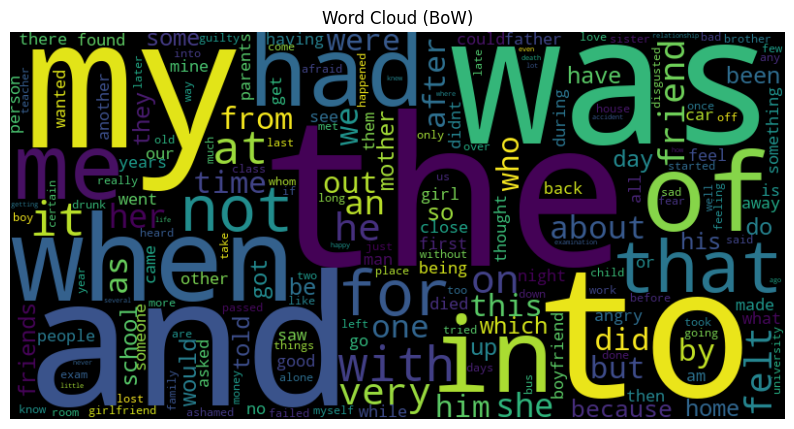

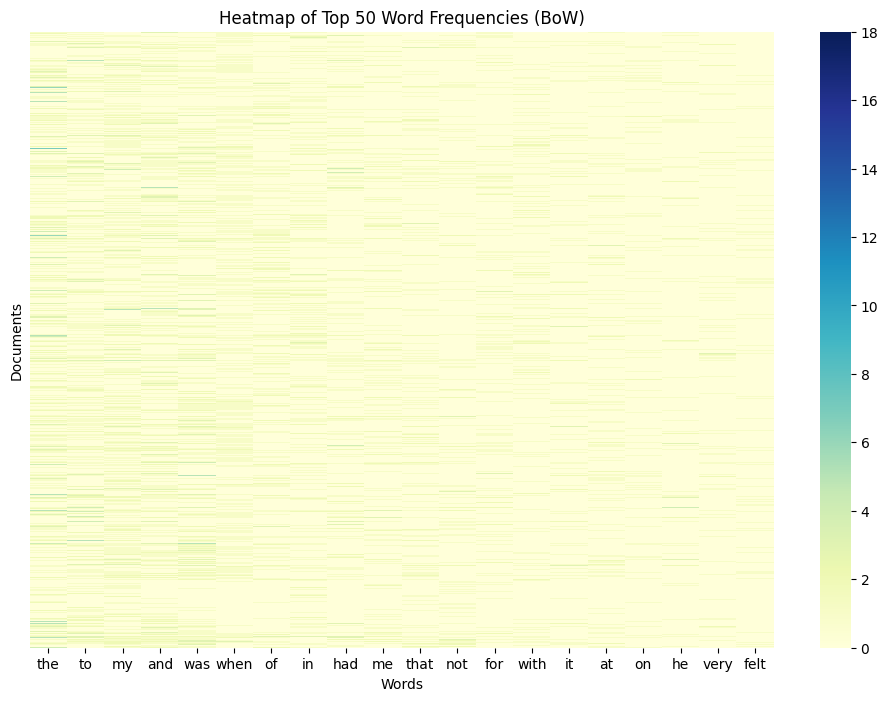

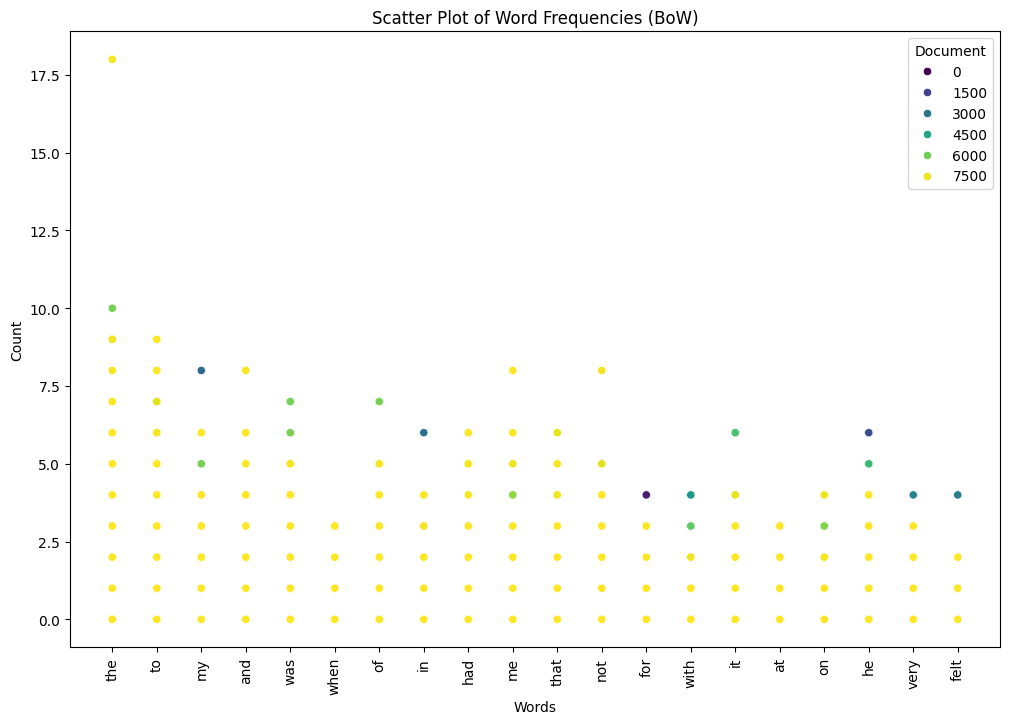

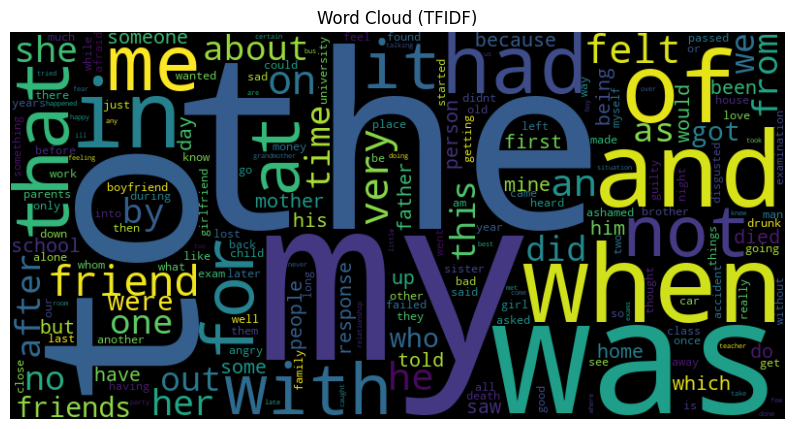

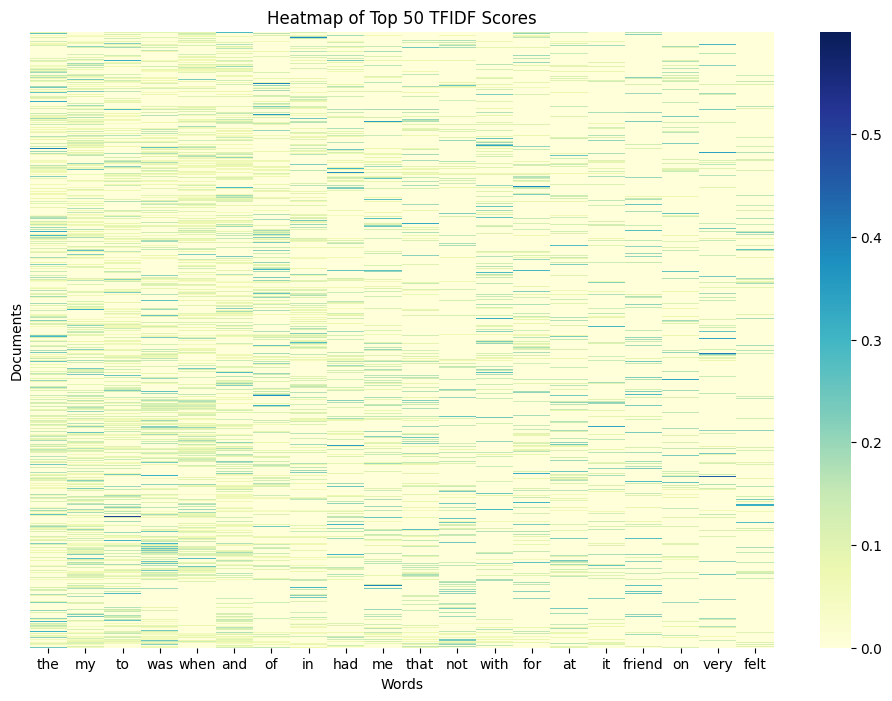

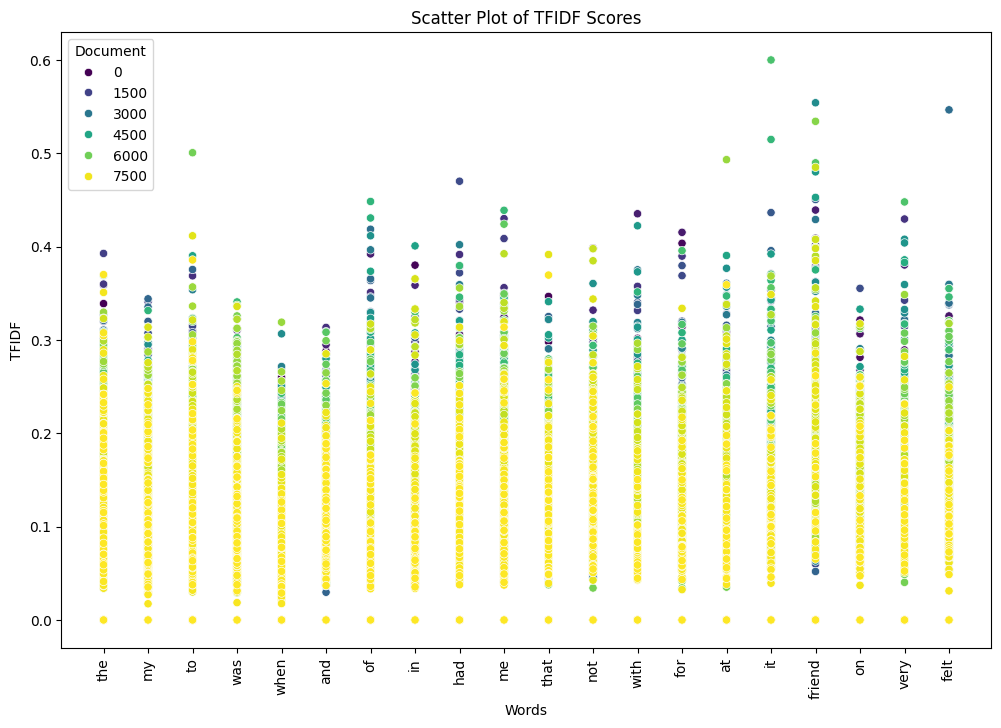

In [9]:
BoW(isear['SIT_clean'])
TF_IDF(isear['SIT_clean'])


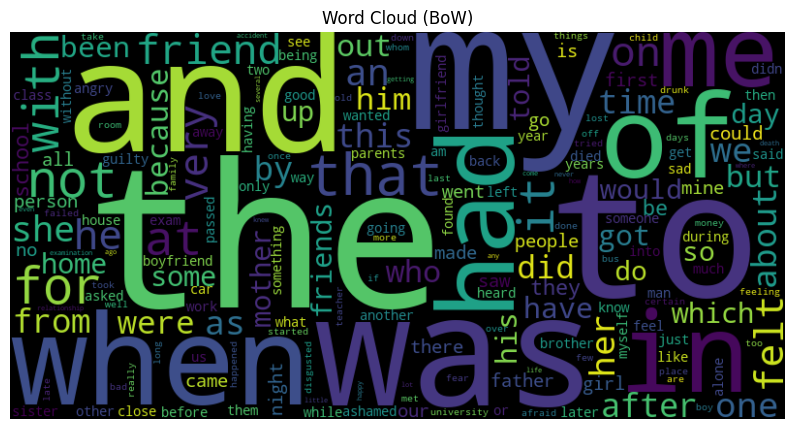

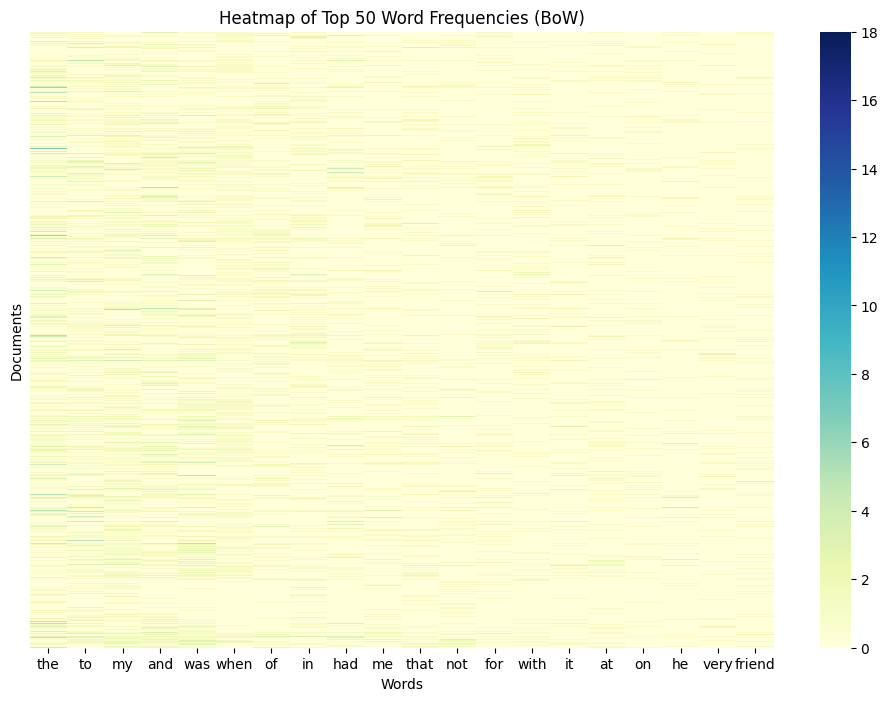

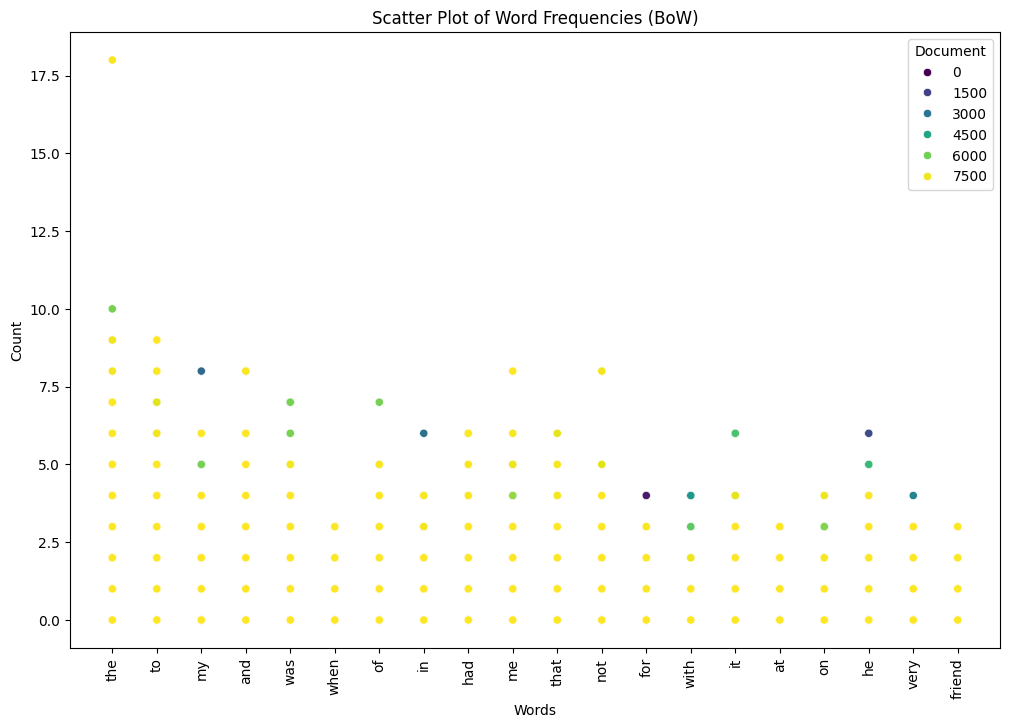

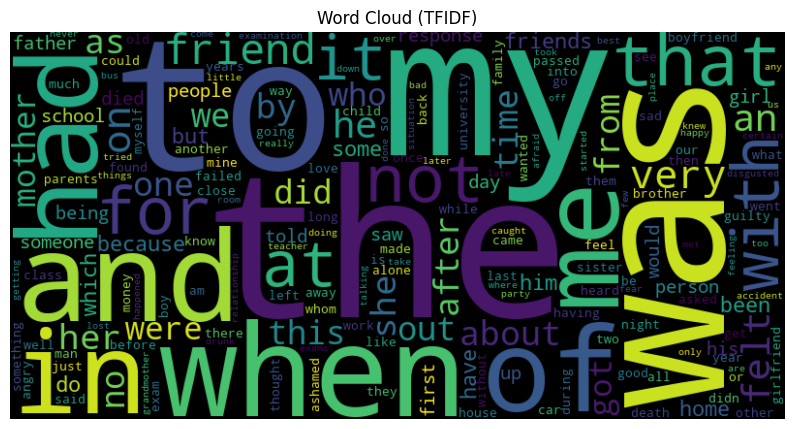

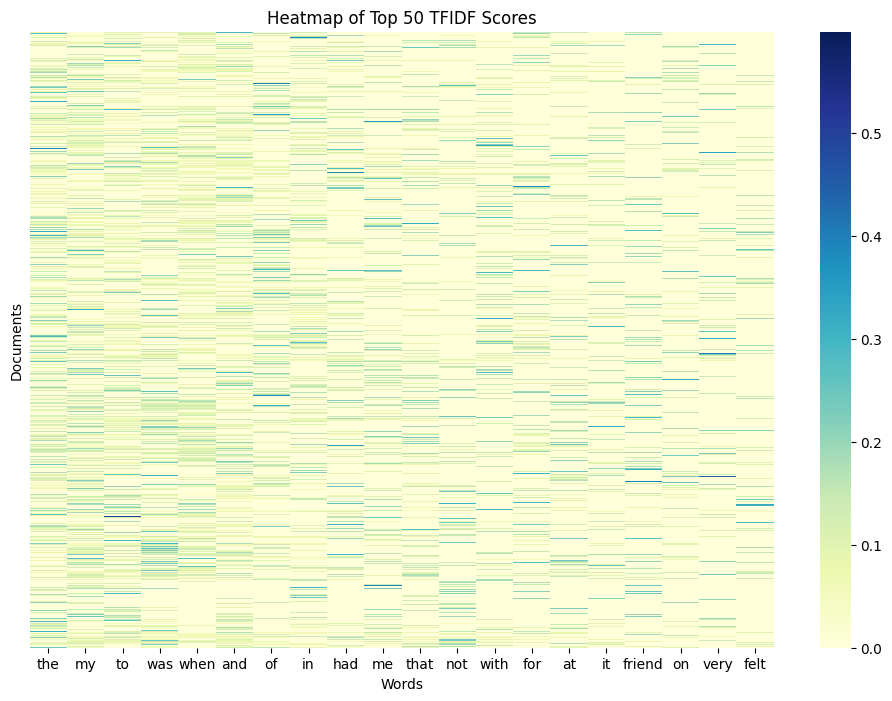

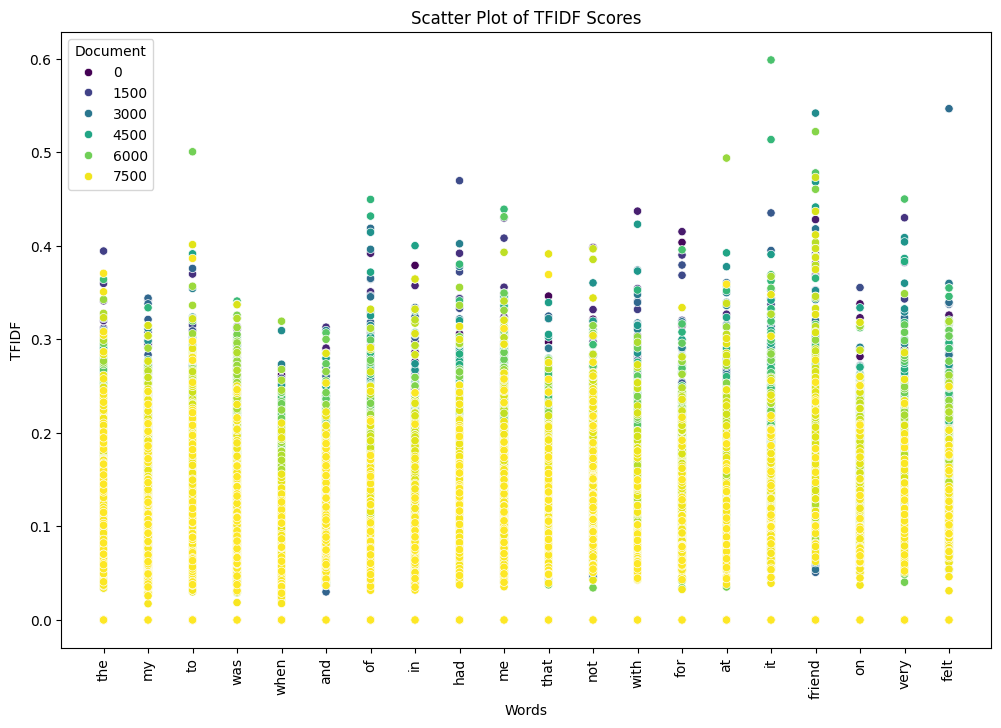

In [10]:
BoW(isear['SIT'])
TF_IDF(isear['SIT'])

In [11]:

analyzer = SentimentIntensityAnalyzer() # Determine the polarity of the data and calculate their sentiment scores, compare and detect un-normal data  

# Function to get sentiment
def get_sentiment(text):
    return analyzer.polarity_scores(text)['compound']  # Compound score between -1 and 1


for i in range(len(isear['SIT'])):
    clean_sentiment_score = get_sentiment(isear['SIT_clean'][i])
    text_sentiment_score = get_sentiment(isear['SIT'][i])
    
    
    

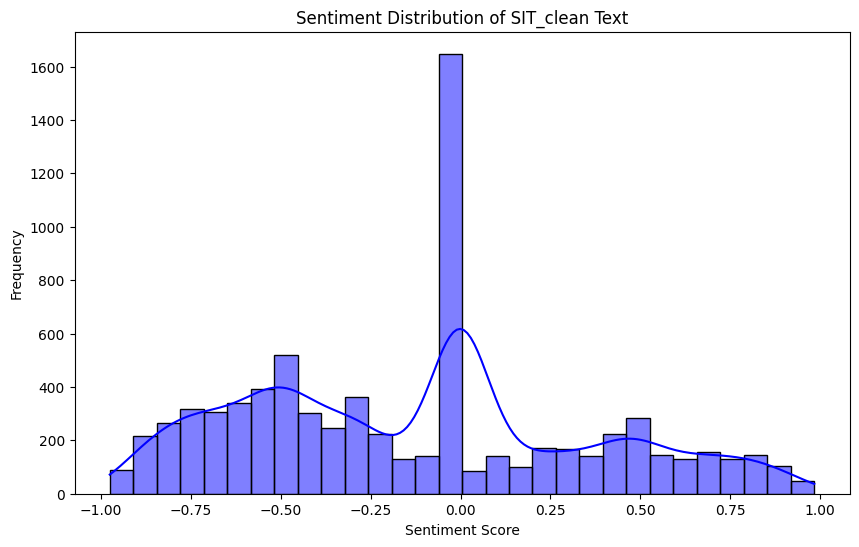

In [12]:
# 1. Sentiment Distribution
sentiment_scores = [get_sentiment(text) for text in isear['SIT_clean']]
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_scores, kde=True, color='blue', bins=30)
plt.title("Sentiment Distribution of SIT_clean Text")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

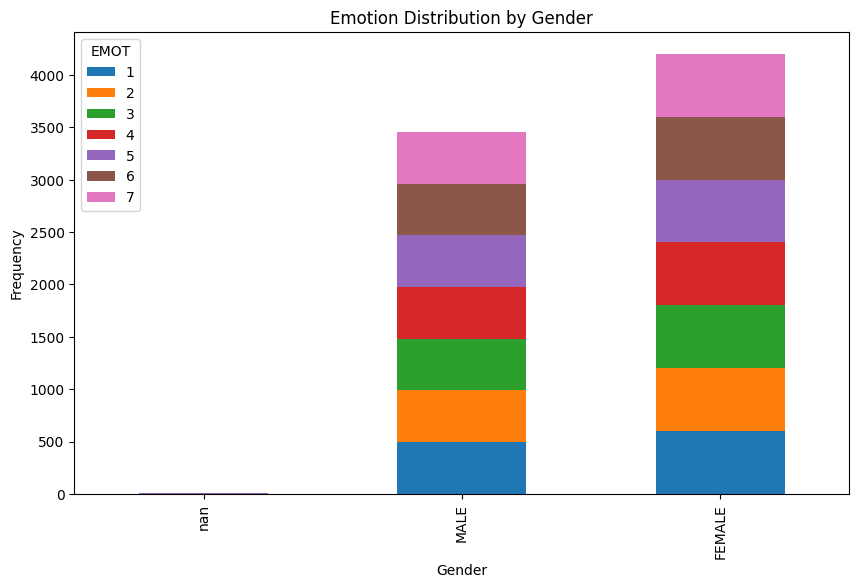

In [13]:
# 3. Gender and Emotion Analysis

SEX_LABELS = {1: "MALE", 2: "FEMALE"}

gender_emotion = isear.groupby(['SEX', 'EMOT']).size().unstack()

gender_emotion.index = gender_emotion.index.map(SEX_LABELS)

gender_emotion.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title("Emotion Distribution by Gender")
plt.ylabel("Frequency")
plt.xlabel("Gender")
plt.show()


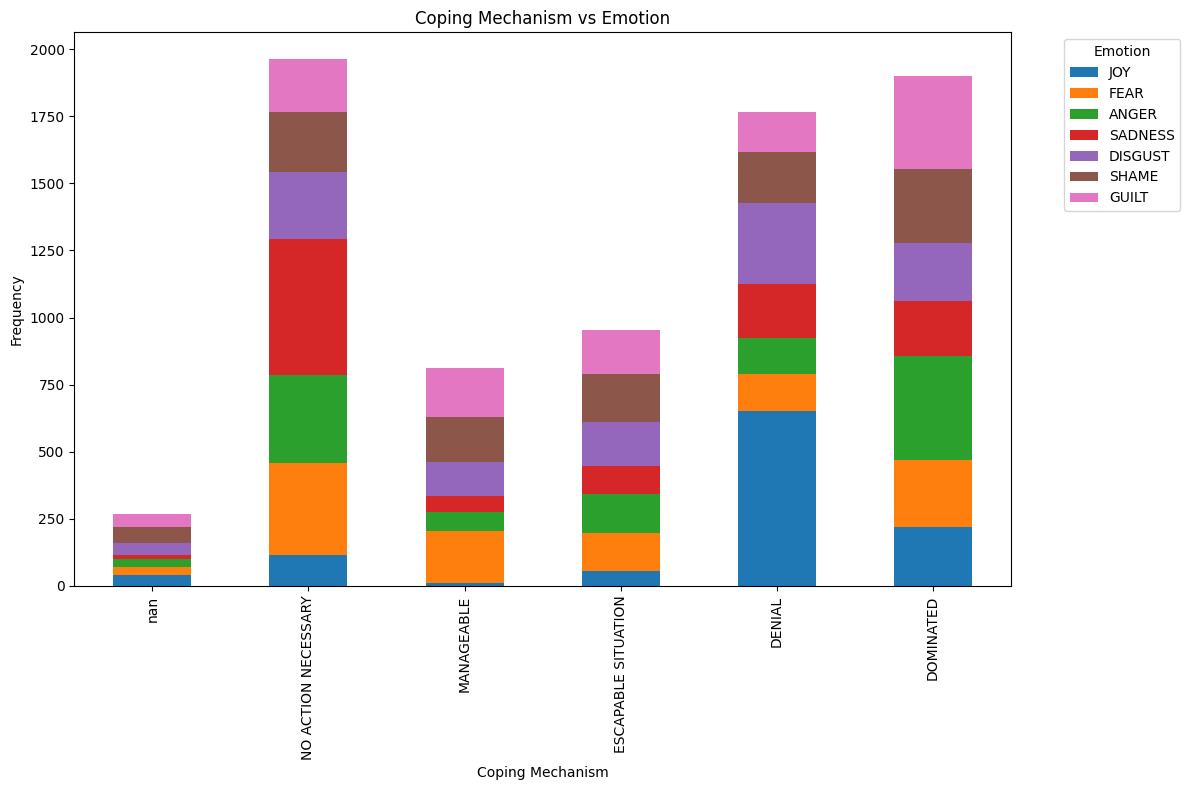

In [14]:
# 4. Coping Mechanism vs Emotion

EMOT_LABELS = {1: "JOY", 2: "FEAR", 3: "ANGER", 4: "SADNESS", 5: "DISGUST", 6: "SHAME", 7: "GUILT"}
# Define labels for coping mechanisms
COPING_LABELS = {
    1: "NO ACTION NECESSARY",
    2: "MANAGEABLE",
    3: "ESCAPABLE SITUATION",
    4: "DENIAL",
    5: "DOMINATED"
}

# Drop rows with missing COPING or EMOT values
cleaned_isear = isear.dropna(subset=['COPING', 'EMOT'])

# Map the numeric labels to descriptive labels
coping_emotion = isear.groupby(['COPING', 'EMOT']).size().unstack()
coping_emotion.index = coping_emotion.index.map(COPING_LABELS)
coping_emotion.columns = coping_emotion.columns.map(EMOT_LABELS)

# Plot the updated bar chart
coping_emotion.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title("Coping Mechanism vs Emotion")
plt.ylabel("Frequency")
plt.xlabel("Coping Mechanism")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [15]:

    
"""
ISEAR Constants
"""

# --------------------------
# Subject Demographics
# --------------------------

# COUN: Country codes and names
COUNTRY_MAP = {
    1: "SWEDEN",
    2: "NORWAY",
    3: "F.R.G.",
    4: "FINLAND",
    5: "GREECE",
    6: "HONG KONG",
    7: "LEBANON",
    8: "AUSTRIA",
    9: "AUSTRALIA",
    10: "BRAZIL",
    11: "BOTSWANA",
    12: "BULGARIA",
    13: "FRANCE",
    14: "ITALY",
    15: "JAPAN",
    16: "NEW ZEALAND",
    17: "NETHERLANDS",
    18: "PORTUGAL",
    19: "SPAIN",
    20: "ZAMBIA",
    21: "ZIMBABWE",
    22: "USA",
    23: "POLAND",
    24: "NIGERIA",
    25: "ISRAEL",
    26: "INDIA",
    27: "MALAWI",
    28: "SWITZERLAND",
    29: "CHILE",
    30: "CHINA MAINLAND",
    31: "YUGOSLAVIA",
    32: "COSTA RICA",
    33: "HONDURAS",
    34: "MEXICO",
    35: "GUATEMALA",
    36: "VENEZUELA",
    37: "EL SALVADOR"
}

# SEX: Gender codes
GENDER_MAP = {
    1: "MALE",
    2: "FEMALE"
}

# RELI: Religion codes
RELIGION_MAP = {
    1: "PROTESTANT",
    2: "CATHOLIC",
    3: "JEWISH",
    4: "HINDU",
    5: "BUDDHIST",
    6: "NATIVE",
    7: "OTHERS",
    8: "ARELIGIOUS"
}

# PRAC: Practicing religion
PRACTICE_MAP = {
    1: "TRUE",
    2: "FALSE"
}

# FOCC & MOCC: Parent occupation codes
OCCUPATION_MAP = {
    1: "HOUSEWIFE",
    2: "UNEMPLOYED",
    3: "STUDENT",
    4: "BLUE COLLAR UNTRAINED",
    5: "BLUE COLLAR TRAINED",
    6: "WHITE COLLAR NONACADEMIC",
    7: "WHITE COLLAR ACADEMIC",
    8: "SELF-EMPLOYED NONACADEMIC",
    9: "SELF-EMPLOYED ACADEMIC"
}

# FIEL: Field of study
FIELD_MAP = {
    1: "PSYCHOLOGY",
    2: "SOCIAL SCIENCES",
    3: "LANGUAGES",
    4: "FINE ARTS",
    5: "LAW",
    6: "NATURAL SCIENCE",
    7: "ENGINEERING",
    8: "MEDICAL",
    9: "OTHER"
}

# --------------------------
# Emotion and Situation
# --------------------------

# EMOT: Emotion codes
EMOTION_MAP = {
    1: "JOY",
    2: "FEAR",
    3: "ANGER",
    4: "SADNESS",
    5: "DISGUST",
    6: "SHAME",
    7: "GUILT"
}

# WHEN: When event occurred
WHEN_MAP = {
    1: "DAYS AGO",
    2: "WEEKS AGO",
    3: "MONTHS AGO",
    4: "YEARS AGO"
}

# LONG: Duration of event
DURATION_MAP = {
    1: "MINUTES",
    2: "HOUR",
    3: "HOURS",
    4: "DAY OR MORE"
}

# --------------------------
# Reaction and Behavior
# --------------------------

# CON, EXPC, PLEA, FAIR, MORL, SELF: Control/Evaluation scales
CONTROL_MAP = {
    0: "NA",
    1: "NONE",
    2: "A LITTLE",
    3: "VERY MUCH"
}

# RELA: Relationship impact
RELATIONSHIP_MAP = {
    0: "NA",
    1: "NEGATIVE",
    2: "NONE",
    3: "POSITIVE"
}

# PLAN: Plan impact
PLAN_MAP = {
    0: "NA",
    1: "HELPED",
    2: "NO MATTER",
    3: "HINDERED"
}

# CAUS: Cause of situation
CAUSE_MAP = {
    0: "NA",
    1: "SELF",
    2: "CLOSE",
    3: "OTHER",
    4: "IMPERSONAL"
}

# COPING: Coping mechanism
COPING_MAP = {
    1: "NO ACTION NECESSARY",
    2: "MANAGEABLE",
    3: "ESCAPABLE SITUATION",
    4: "DENIAL",
    5: "DOMINATED"
}

# --------------------------
# Dataset Fields
# --------------------------

ISEAR_FIELDS = [
    "ID", "CITY", "COUN", "SUBJ", "SEX",
    "AGE", "RELI", "PRAC", "FOCC", "MOCC",
    "FIEL", "EMOT", "WHEN", "LONG", "INTS",
    "ERGO", "TROPHO", "TEMPER", "EXPRES",
    "MOVE", "EXP1", "EXP2", "EXP10", "PARAL",
    "CON", "EXPC", "PLEA", "PLAN", "FAIR",
    "CAUS", "COPING", "MORL", "SELF", "RELA",
    "VERBAL", "NEUTRO", "Field1", "Field3",
    "Field2", "MYKEY", "SIT", "STATE"
]

# --------------------------
# Value Ranges
# --------------------------

# Intensity ranges
INTENSITY_RANGE = (1, 4)  # INTS
ERGO_RANGE = (0, 4)       # ERGO
TROPHO_RANGE = (0, 3)     # TROPHO
TEMPER_RANGE = (-1, 2)    # TEMPER
MOVE_RANGE = (-1, 1)      # MOVE
EXPRES_RANGE = (0, 6)     # EXPRES
PARAL_RANGE = (0, 3)      # PARAL

# Binary fields
BINARY_FIELDS = ["EXP1", "EXP2", "EXP10"]

In [17]:
# Apply all categorical mappings
isear['COUN'] = isear['COUN'].map(COUNTRY_MAP)
isear['RELI'] = isear['RELI'].map(RELIGION_MAP)
isear['FOCC'] = isear['FOCC'].map(OCCUPATION_MAP)
isear['SEX'] = isear['SEX'].map(GENDER_MAP)
isear['EMOT'] = isear['EMOT'].map(EMOTION_MAP)
isear['COPING'] = isear['COPING'].map(COPING_MAP)


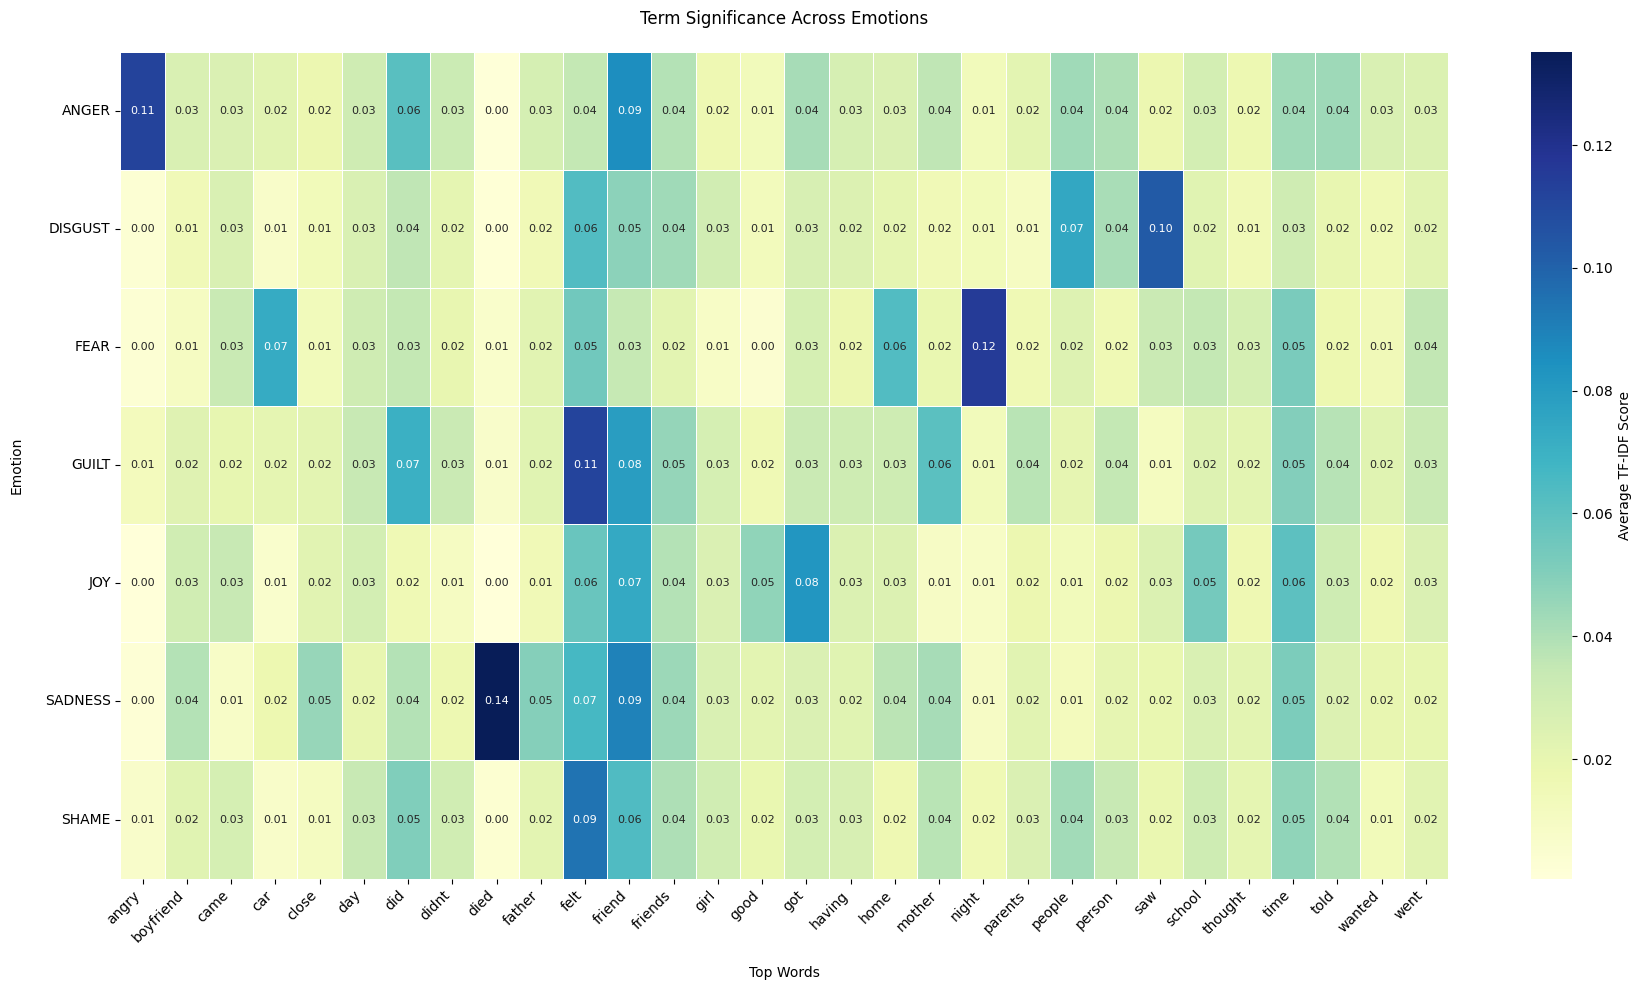

In [37]:
# ========================
# 5. Text Analysis per Emotion (Heatmap Version)
# ========================
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF matrix with limited features
tfidf = TfidfVectorizer(max_features=30, stop_words='english')  # Reduced to 30 features
tfidf_matrix = tfidf.fit_transform(isear['SIT_clean'])
feature_names = tfidf.get_feature_names_out()

# Create DataFrame with emotions
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)
df_tfidf['EMOTION'] = isear['EMOT']

# Calculate mean TF-IDF scores per emotion
emotion_tfidf = df_tfidf.groupby('EMOTION').mean()

# Plot heatmap with adjusted parameters
plt.figure(figsize=(18, 10))  # Increased figure size

ax = sns.heatmap(
    emotion_tfidf,
    cmap='YlGnBu',
    annot=True,
    fmt='.2f',  # Reduced to 2 decimal places
    linewidths=.5,
    cbar_kws={'label': 'Average TF-IDF Score'},
    annot_kws={'size': 8}  # Smaller annotation text
)

# Adjust labels and rotation
plt.title('Term Significance Across Emotions', pad=20)
plt.xlabel('Top Words', labelpad=15)
plt.ylabel('Emotion', labelpad=15)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels
plt.yticks(rotation=0)

# Tight layout for better spacing
plt.tight_layout()
plt.show()

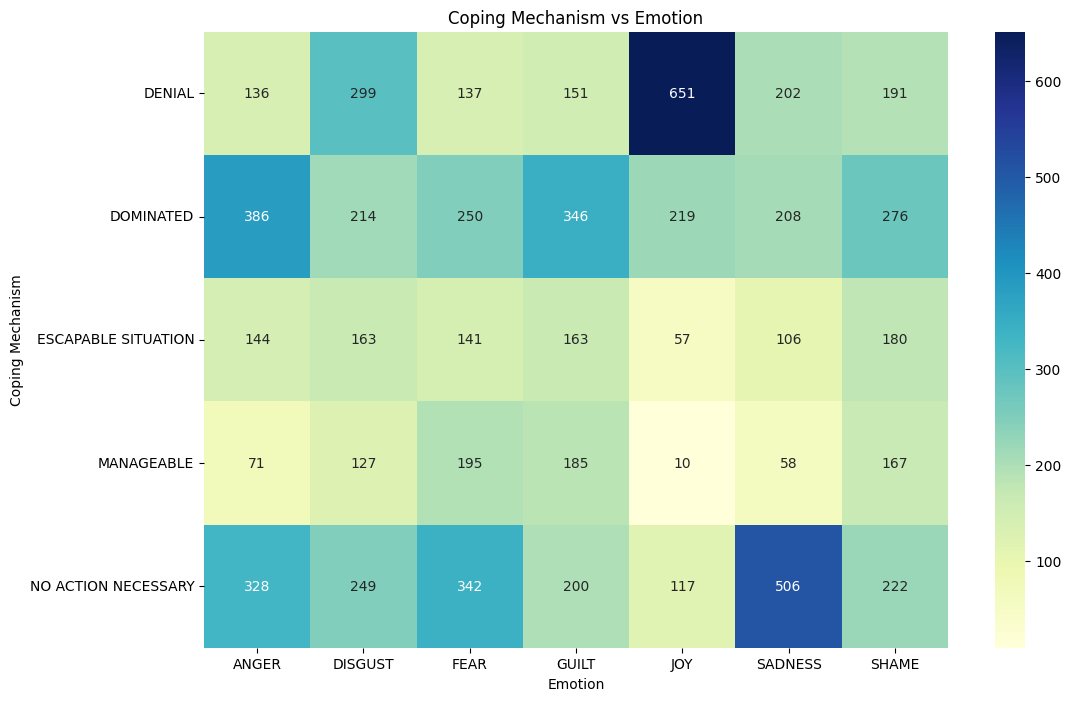

In [33]:
# ========================
# 6. Coping Mechanisms & Emotions
# ========================
plt.figure(figsize=(12, 8))
coping_matrix = isear.groupby(['COPING', 'EMOT']).size().unstack()
sns.heatmap(coping_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Coping Mechanism vs Emotion")
plt.xlabel("Emotion")
plt.ylabel("Coping Mechanism")
plt.show()

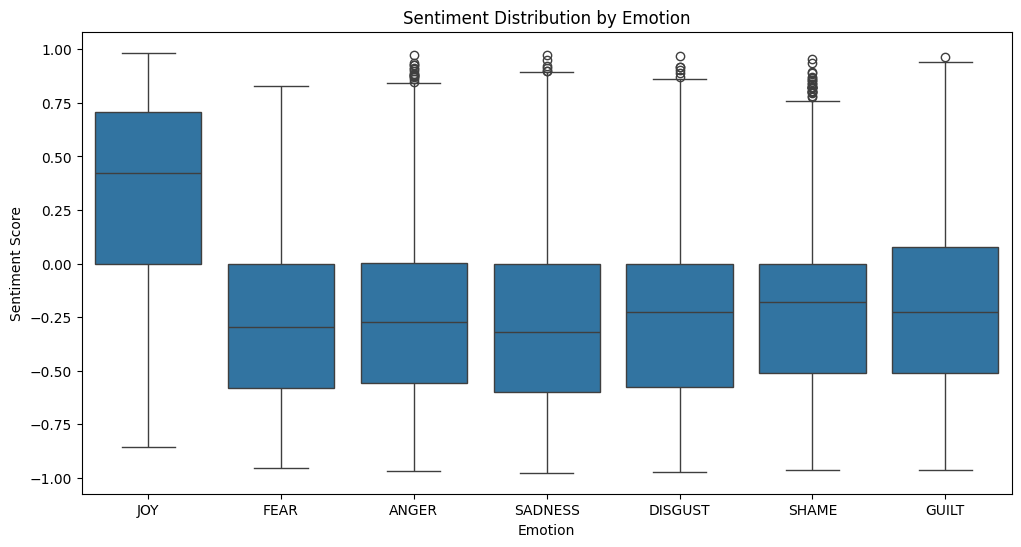

In [34]:
# ========================
# 7. Sentiment Analysis
# ========================
isear['sentiment'] = isear['SIT_clean'].apply(get_sentiment)

plt.figure(figsize=(12, 6))
sns.boxplot(x='EMOT', y='sentiment', data=isear)
plt.title("Sentiment Distribution by Emotion")
plt.xlabel("Emotion")
plt.ylabel("Sentiment Score")
plt.show()

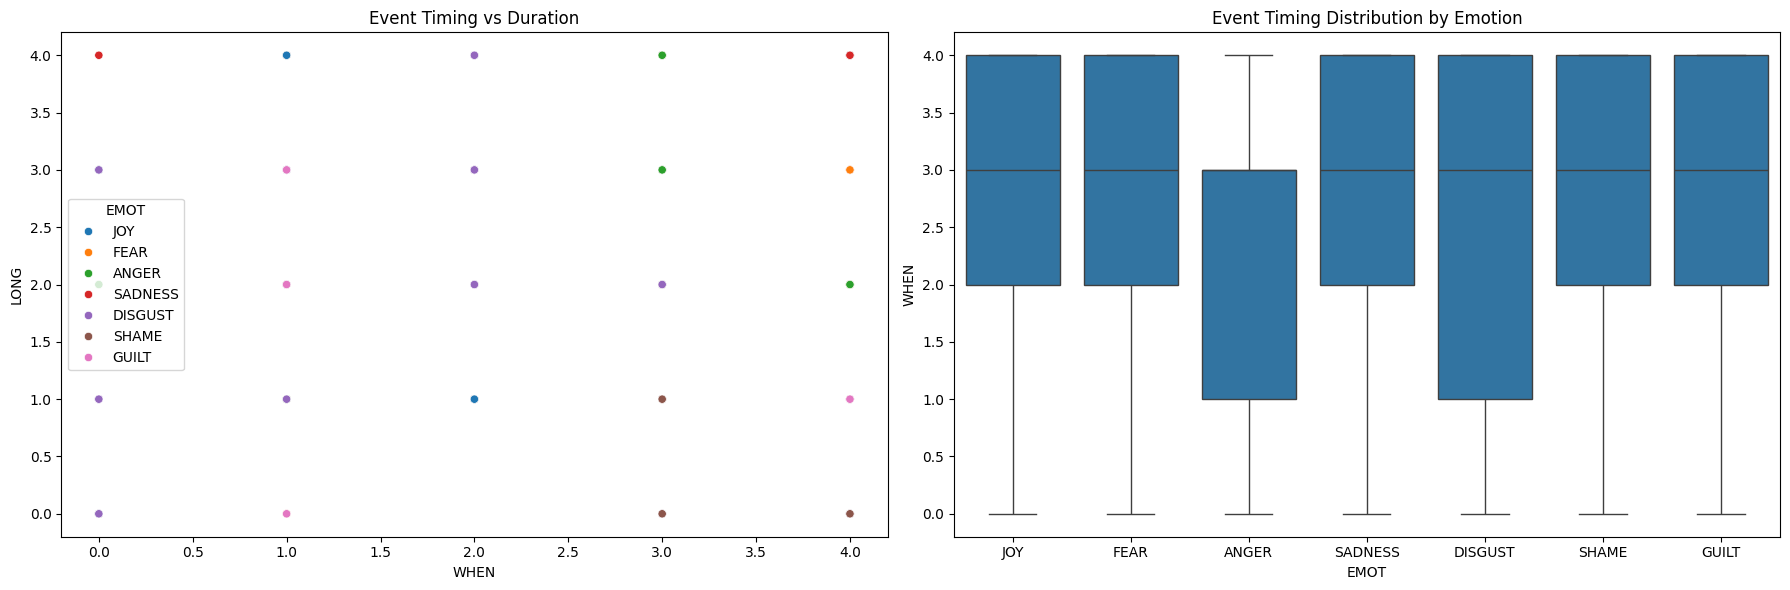

In [35]:
# ========================
# 8. Time & Duration Analysis
# ========================
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(x='WHEN', y='LONG', hue='EMOT', data=isear, ax=ax[0])
ax[0].set_title("Event Timing vs Duration")

sns.boxplot(x='EMOT', y='WHEN', data=isear, ax=ax[1])
ax[1].set_title("Event Timing Distribution by Emotion")

plt.tight_layout()
plt.show()